# Feature Engineering, Decision Tree Pruning and Hyperparameter Tuning

### The Data
We will be using the datasets <em>energia_*.csv</em> and <em>meteo_*.csv</em>. 

The first one contains 6 features where the one used for training has 2256 entries, the one for tunning has 8760 and for testing has also 2256, including:

- Data
- Hora
- Normal (kWh)
- Horario Economico (kWh)
- Autoconsumo (kWh)
- Injecao na rede (kWh)
 
And the second one contains 15 features where the one used for training has 2928 entries, the one for tunning has 8760 and for testing has also 1752, including:

- dt
- dt_iso
- city_name 
- temp
- feels_like
- temp_min
- temp_max
- pressure
- sea_level
- grnd_level
- humidity
- wind_speed
- rain_1h
- clouds_all
- weather_description

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [2]:
energy_1 = pd.read_csv('energia_202109-202112.csv')
energy_2 = pd.read_csv('energia_202201-202212.csv')
energy_test = pd.read_csv('energia_202301-202304.csv')

meteo_1 = pd.read_csv('meteo_202109-202112.csv')
meteo_2 = pd.read_csv('meteo_202201-202212.csv')
meteo_test = pd.read_csv('meteo_202301-202304.csv')

In [3]:
energy_1.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)'],
      dtype='object')

In [4]:
energy_1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [5]:
energy_2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [6]:
energy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [7]:
energy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horario Economico (kWh)  8760 non-null   float64
 4   Autoconsumo (kWh)        8760 non-null   float64
 5   Injecao na rede (kWh)    2673 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 410.8+ KB


In [8]:
energy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 105.9+ KB


In [9]:
meteo_1.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')

In [10]:
meteo_1.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [11]:
meteo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [12]:
meteo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [13]:
meteo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

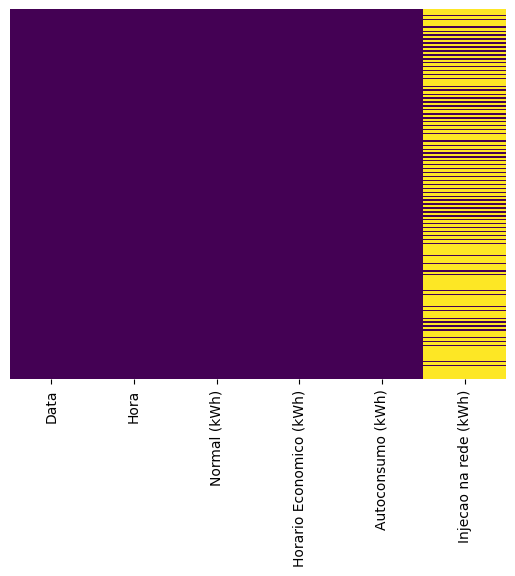

In [14]:
sns.heatmap(energy_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

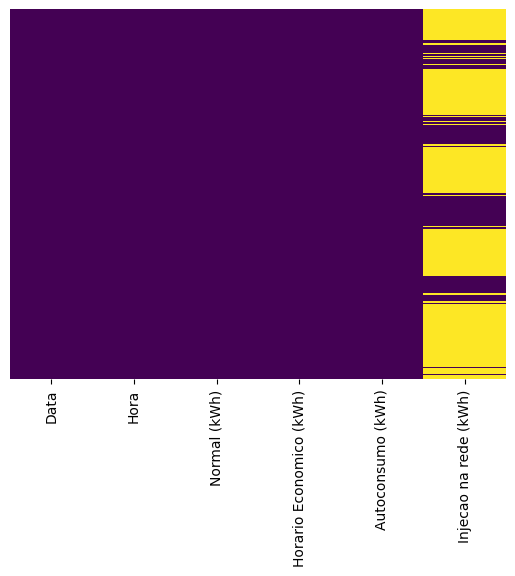

In [15]:
sns.heatmap(energy_2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

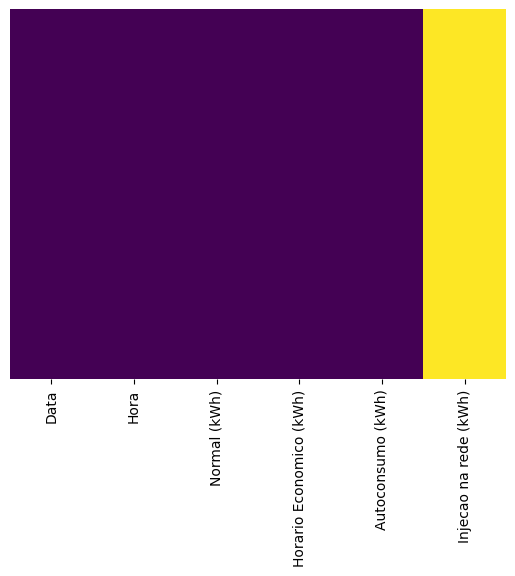

In [16]:
sns.heatmap(energy_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

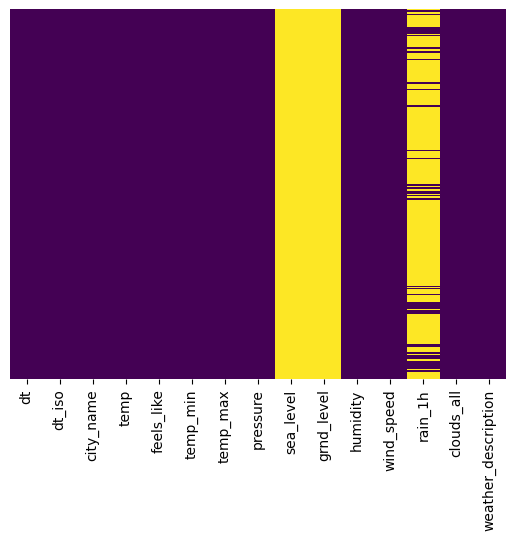

In [17]:
sns.heatmap(meteo_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

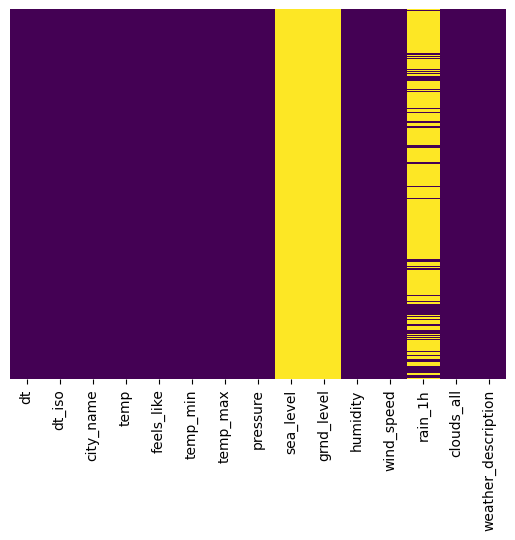

In [18]:
sns.heatmap(meteo_2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

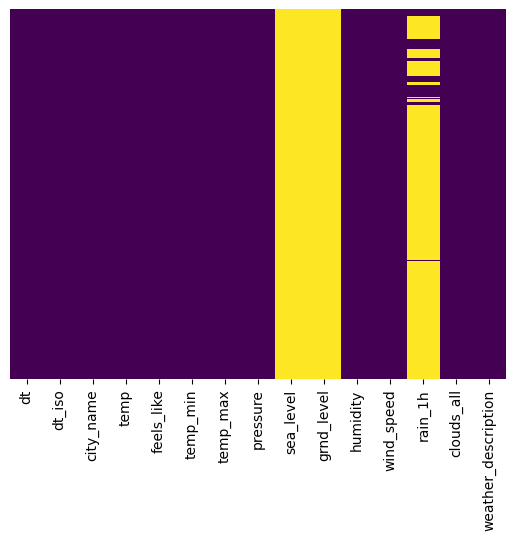

In [19]:
sns.heatmap(meteo_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
energy_1.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injecao na rede (kWh)      1690
dtype: int64

In [21]:
energy_2.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injecao na rede (kWh)      6087
dtype: int64

In [22]:
energy_test.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injecao na rede (kWh)      2256
dtype: int64

In [23]:
meteo_1.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2928
grnd_level             2928
humidity                  0
wind_speed                0
rain_1h                2391
clouds_all                0
weather_description       0
dtype: int64

In [24]:
meteo_2.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              8760
grnd_level             8760
humidity                  0
wind_speed                0
rain_1h                6862
clouds_all                0
weather_description       0
dtype: int64

In [25]:
meteo_test.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              1752
grnd_level             1752
humidity                  0
wind_speed                0
rain_1h                1546
clouds_all                0
weather_description       0
dtype: int64

### Drop or fill
Let's verify how the data is presented in the feature <em>Injecao na rede</em>

In [26]:
energy_1['Injecao na rede (kWh)'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Injecao na rede (kWh), dtype: object

In [27]:
energy_1[energy_1['Injecao na rede (kWh)'].isnull()]

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,NaN
1,2021-09-29,1,0.000,0.000,0.0,NaN
2,2021-09-29,2,0.000,0.000,0.0,NaN
3,2021-09-29,3,0.000,0.000,0.0,NaN
4,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,NaN
2252,2021-12-31,20,0.732,0.000,0.0,NaN
2253,2021-12-31,21,0.704,0.000,0.0,NaN
2254,2021-12-31,22,0.000,0.424,0.0,NaN


Copy of the data to experiment the options

In [28]:
energy_1_m1 = energy_1.copy()
energy_1_m2 = energy_1.copy()

#### a) Drop

In [29]:
energy_1_m1.drop(['Injecao na rede (kWh)'], axis=1, inplace=True)
energy_1_m1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,2021-09-29,0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0


#### b) Fill with zero

In [30]:
energy_1_m2.fillna(0, inplace=True)
energy_1_m2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


We need to choose one of the options to keep going. We will choose to fill the column since it brings added value to our goal.

In [31]:
energy_1_copy = energy_1.fillna(0)
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


Let's see if there are still missing values for energy

<Axes: >

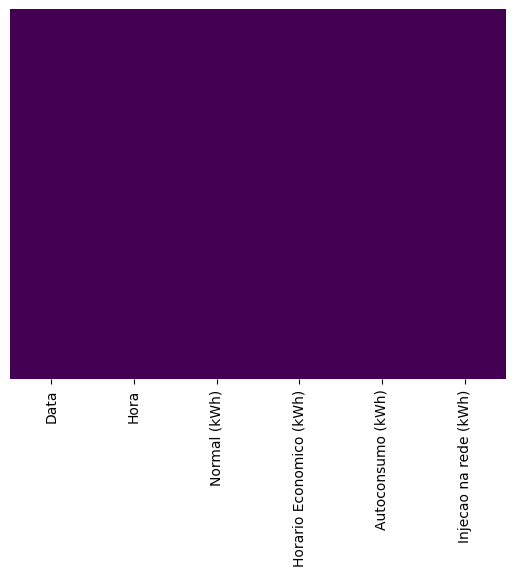

In [32]:
sns.heatmap(energy_1_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now let's do the same but for the other datasets

In [33]:
energy_2_copy = energy_2.fillna(0)
energy_2_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,0
1,2022-01-01,1,0.0,0.429,0.0,0
2,2022-01-01,2,0.0,0.463,0.0,0
3,2022-01-01,3,0.0,0.545,0.0,0
4,2022-01-01,4,0.0,0.439,0.0,0


<Axes: >

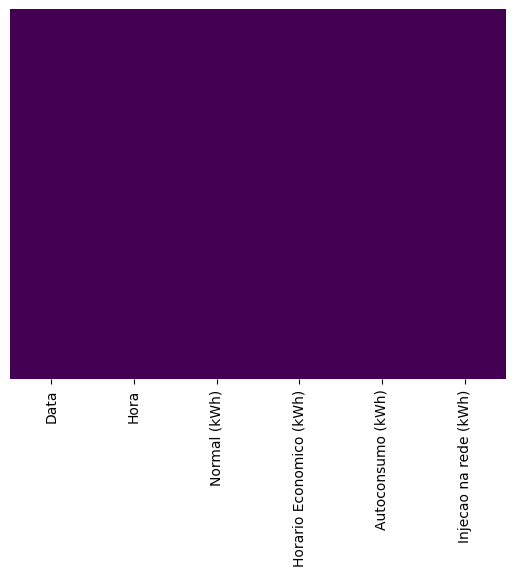

In [34]:
sns.heatmap(energy_2_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
energy_test_copy = energy_test.fillna(0)
energy_test_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2023-01-01,0,0.0,0.467,0.0,0.0
1,2023-01-01,1,0.0,0.577,0.0,0.0
2,2023-01-01,2,0.0,0.346,0.0,0.0
3,2023-01-01,3,0.0,0.270,0.0,0.0
4,2023-01-01,4,0.0,0.252,0.0,0.0


<Axes: >

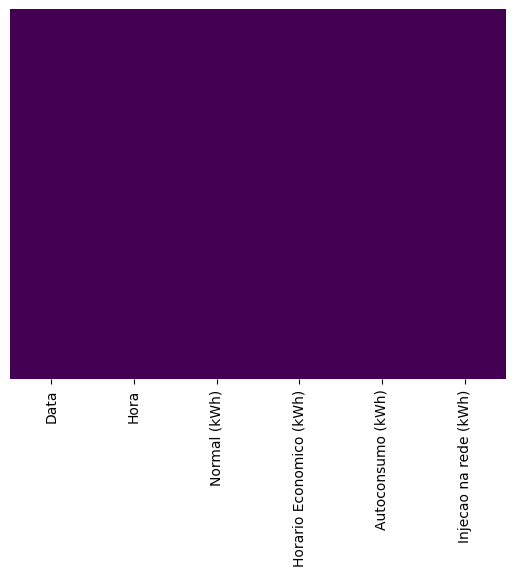

In [36]:
sns.heatmap(energy_test_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
energy_1_copy.isnull().sum()

Data                       0
Hora                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dtype: int64

In [38]:
energy_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    2256 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [39]:
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


Let's now verify how the data is presented in the features <em>sea_level</em>, <em>grnd_level</em> and <em>rain_1h</em>

In [40]:
meteo_1['sea_level'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: sea_level, dtype: float64

In [41]:
meteo_1['grnd_level'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: grnd_level, dtype: float64

In [42]:
meteo_1['rain_1h'].head()

0     NaN
1     NaN
2     NaN
3    0.14
4    1.26
Name: rain_1h, dtype: float64

Now we need to choose one of the options to keep going. We will choose to drop both the <em>sea_level</em> and <em>grnd_level</em> since they don't bring any value to our model and fill the column with the feature <em>rain_1h</em> since it brings added value to our goal.

In [43]:
meteo_1_copy = meteo_1.drop(['sea_level', 'grnd_level'], axis=1, inplace=False)
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Now we do the same to the other datasets

In [44]:
meteo_2_copy = meteo_2.drop(['sea_level', 'grnd_level'], axis=1, inplace=False)
meteo_test_copy = meteo_test.drop(['sea_level', 'grnd_level'], axis=1, inplace=False)
meteo_2_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,67,3.12,NaN,15,few clouds


In [45]:
meteo_test_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,moderate rain


In [46]:
meteo_1_copy.fillna(0, inplace=True)
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


In [47]:
meteo_2_copy.fillna(0, inplace=True)
meteo_test_copy.fillna(0, inplace=True)
meteo_2_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.15,0.0,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,65,3.14,0.0,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,66,3.12,0.0,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,67,3.08,0.0,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,67,3.12,0.0,15,few clouds


In [48]:
meteo_test_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,moderate rain


Let's see if there are still missing values for meteo

<Axes: >

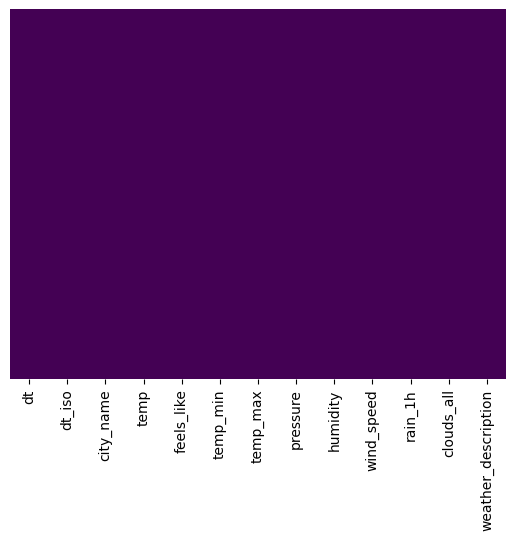

In [49]:
sns.heatmap(meteo_1_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

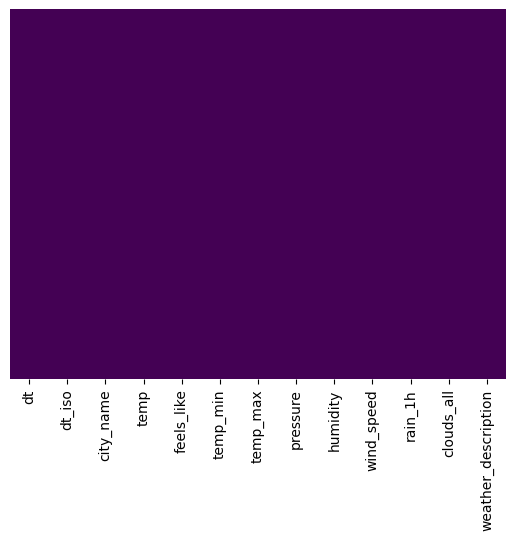

In [50]:
sns.heatmap(meteo_2_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

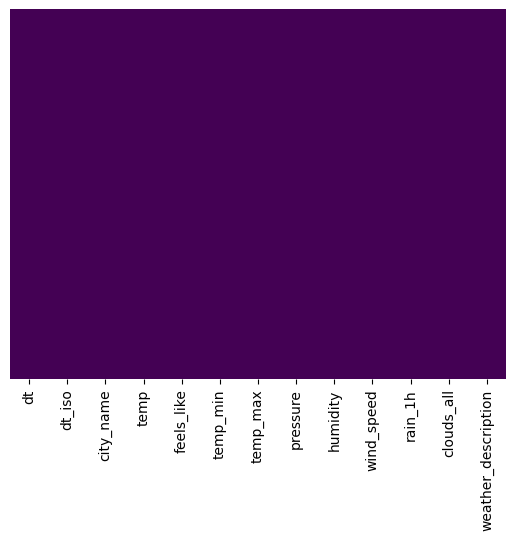

In [51]:
sns.heatmap(meteo_test_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
meteo_1_copy.isnull().sum()

dt                     0
dt_iso                 0
city_name              0
temp                   0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
rain_1h                0
clouds_all             0
weather_description    0
dtype: int64

In [53]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   humidity             2928 non-null   int64  
 9   wind_speed           2928 non-null   float64
 10  rain_1h              2928 non-null   float64
 11  clouds_all           2928 non-null   int64  
 12  weather_description  2928 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 297.5+ KB


In [54]:
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Looking at the dates in both files, we can see that in the <em>energy_*</em> dataset the date is separated into two columns, one with said date without it's hour and another with it's taken hour. However in the <em>meteo_*</em> dataset the date is properly defined from the year to the second it was taken, even including it's time zone.

So with this it's better if we combine these dates into a single column since further ahead we will combine these datasets.

In [55]:
energy_1_copy['Hora'] = energy_1_copy['Hora'].apply(lambda x: str(x).zfill(2))

energy_1_copy['Data'] = energy_1_copy['Data'] + ' ' + energy_1_copy['Hora'] + ':00:00'
energy_1_copy['Data']

0       2021-09-29 00:00:00
1       2021-09-29 01:00:00
2       2021-09-29 02:00:00
3       2021-09-29 03:00:00
4       2021-09-29 04:00:00
               ...         
2251    2021-12-31 19:00:00
2252    2021-12-31 20:00:00
2253    2021-12-31 21:00:00
2254    2021-12-31 22:00:00
2255    2021-12-31 23:00:00
Name: Data, Length: 2256, dtype: object

With this in this format we can now drop the <em>Hora</em> feature since it's no longer needed.

In [56]:
energy_1_copy.drop(['Hora'], axis=1, inplace=True)
energy_1_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,0
1,2021-09-29 01:00:00,0.0,0.0,0.0,0
2,2021-09-29 02:00:00,0.0,0.0,0.0,0
3,2021-09-29 03:00:00,0.0,0.0,0.0,0
4,2021-09-29 04:00:00,0.0,0.0,0.0,0


Now let's do the same to the other datasets.

In [57]:
energy_2_copy['Hora'] = energy_2_copy['Hora'].apply(lambda x: str(x).zfill(2))

energy_2_copy['Data'] = energy_2_copy['Data'] + ' ' + energy_2_copy['Hora'] + ':00:00'
energy_2_copy['Data']

energy_test_copy['Hora'] = energy_test_copy['Hora'].apply(lambda x: str(x).zfill(2))

energy_test_copy['Data'] = energy_test_copy['Data'] + ' ' + energy_test_copy['Hora'] + ':00:00'
energy_test_copy['Data']

energy_2_copy.drop(['Hora'], axis=1, inplace=True)
energy_test_copy.drop(['Hora'], axis=1, inplace=True)
energy_2_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01 00:00:00,0.0,0.486,0.0,0
1,2022-01-01 01:00:00,0.0,0.429,0.0,0
2,2022-01-01 02:00:00,0.0,0.463,0.0,0
3,2022-01-01 03:00:00,0.0,0.545,0.0,0
4,2022-01-01 04:00:00,0.0,0.439,0.0,0


In [58]:
energy_test_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2023-01-01 00:00:00,0.0,0.467,0.0,0.0
1,2023-01-01 01:00:00,0.0,0.577,0.0,0.0
2,2023-01-01 02:00:00,0.0,0.346,0.0,0.0
3,2023-01-01 03:00:00,0.0,0.270,0.0,0.0
4,2023-01-01 04:00:00,0.0,0.252,0.0,0.0


There are features that are of the type <em>object</em>: <em>Data</em> and <em>Injecao na rede (kWh)</em>.

Let's see how many different values each feature has.

In [59]:
energy_1_copy.nunique()

Data                       2256
Normal (kWh)                772
Horario Economico (kWh)     329
Autoconsumo (kWh)           440
Injecao na rede (kWh)         5
dtype: int64

In [60]:
energy_1_copy['Injecao na rede (kWh)'].nunique()

5

In [61]:
energy_1_copy['Injecao na rede (kWh)'].describe()

count     2256
unique       5
top          0
freq      1690
Name: Injecao na rede (kWh), dtype: int64

There are features that are of the type <em>object</em>: <em>dt_iso</em>, <em>city_name </em> and <em>weather_description</em>.

Let's see how many different values each feature has.

In [62]:
meteo_1_copy.nunique()

dt                     2928
dt_iso                 2928
city_name                 1
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
humidity                 70
wind_speed              569
rain_1h                 174
clouds_all              101
weather_description       8
dtype: int64

## 2. Handling categoric data

Feature <em>city_name</em>

In [63]:
meteo_1_copy['city_name'].head()

0    local
1    local
2    local
3    local
4    local
Name: city_name, dtype: object

The unique value of <em>city_name</em> is <em>Guimarães</em>. We can drop this feature as well.

In [64]:
meteo_1_copy.drop(['city_name'], axis=1, inplace=True)
meteo_1_copy.dropna(inplace=True)

In [65]:
meteo_1_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Let's do the same for the rest of the datasets

In [66]:
meteo_2_copy.drop(['city_name'], axis=1, inplace=True)
meteo_2_copy.dropna(inplace=True)
meteo_test_copy.drop(['city_name'], axis=1, inplace=True)
meteo_test_copy.dropna(inplace=True)

In [67]:
meteo_2_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,16.59,16.00,16.21,16.72,1024,65,3.15,0.0,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,16.59,16.00,16.21,16.72,1024,65,3.14,0.0,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,16.59,16.03,15.67,16.72,1024,66,3.12,0.0,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,13.59,12.75,11.61,16.16,1023,67,3.08,0.0,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,14.97,14.27,14.72,15.66,1023,67,3.12,0.0,15,few clouds


In [68]:
meteo_test_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,moderate rain


Let's see the feature <em>weather_description</em>:

In [69]:
meteo_1_copy['weather_description'].value_counts()

weather_description
sky is clear            795
overcast clouds         667
light rain              412
broken clouds           402
scattered clouds        324
few clouds              203
moderate rain           110
heavy intensity rain     15
Name: count, dtype: int64

In [70]:
meteo_1_copy['weather_description'].value_counts().count()

8

Let's create a barplot of <em>Frequency Distribution of Weather Discription</em> (style="darkgrid", fontsize=12) for each dataset

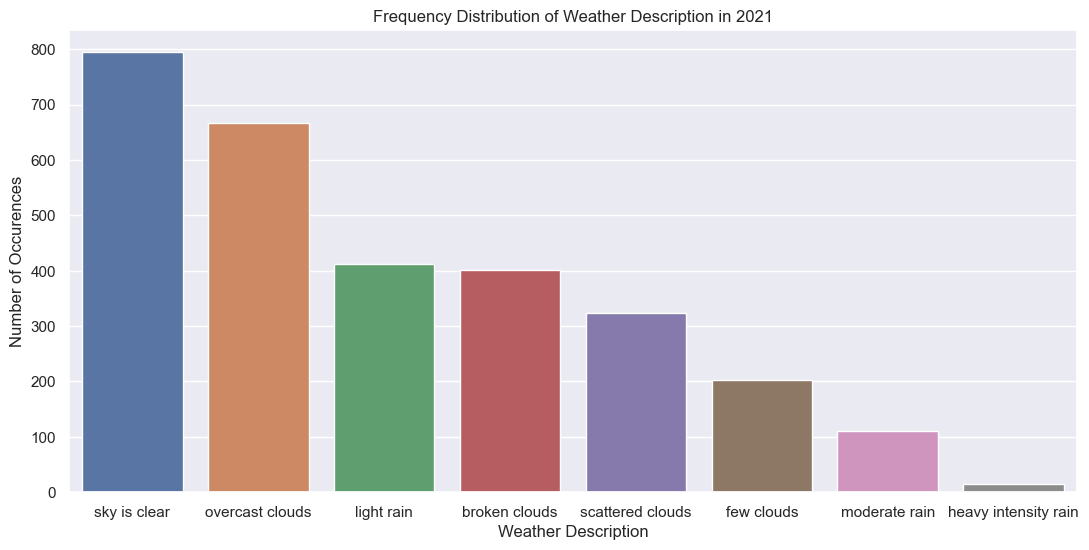

In [71]:
weather_discription_count = meteo_1_copy['weather_description'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=weather_discription_count.index, y=weather_discription_count.values)
plt.title('Frequency Distribution of Weather Description in 2021')
plt.ylabel('Number of Occurences', fontsize=12) 
plt.xlabel('Weather Description', fontsize=12) 
plt.show()

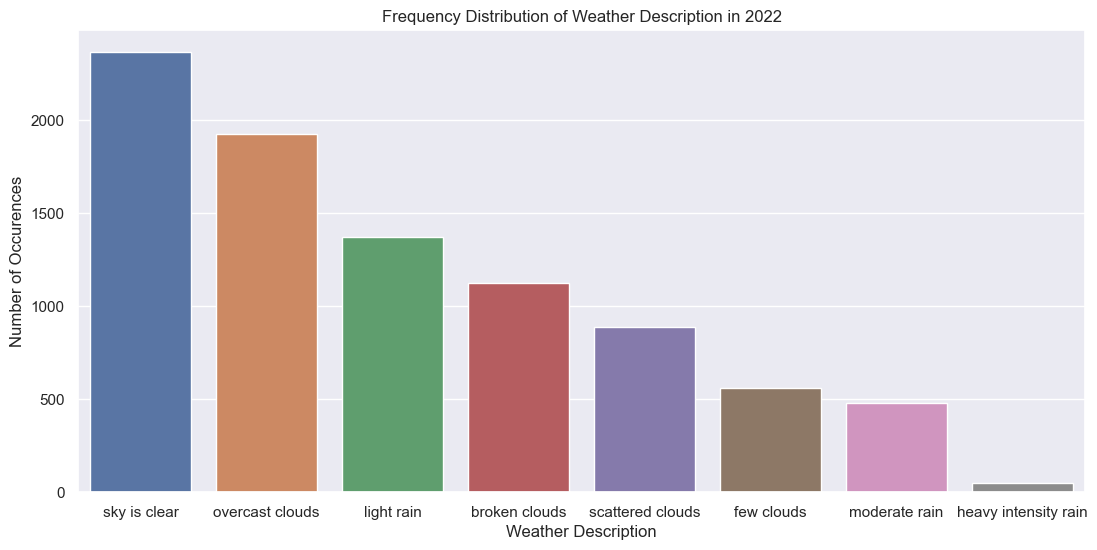

In [72]:
weather_discription_count_2 = meteo_2_copy['weather_description'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=weather_discription_count_2.index, y=weather_discription_count_2.values)
plt.title('Frequency Distribution of Weather Description in 2022') 
plt.ylabel('Number of Occurences', fontsize=12) 
plt.xlabel('Weather Description', fontsize=12)
plt.show()

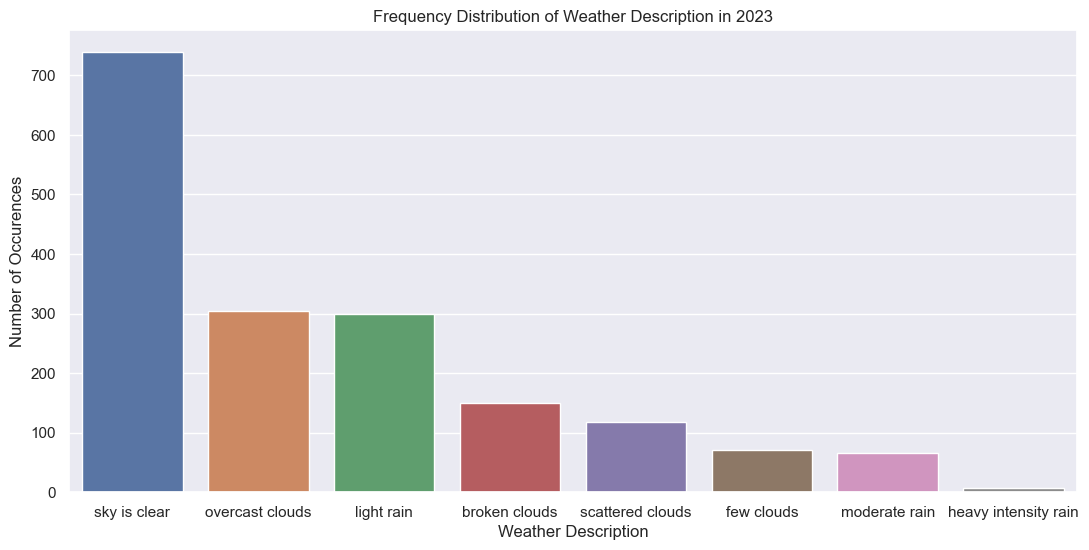

In [73]:
weather_discription_count_test = meteo_test_copy['weather_description'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=weather_discription_count_test.index, y=weather_discription_count_test.values)
plt.title('Frequency Distribution of Weather Description in 2023') 
plt.ylabel('Number of Occurences', fontsize=12) 
plt.xlabel('Weather Description', fontsize=12)
plt.show()

Let's create a pie plot of <em>Category Distribution of Weather Discription</em> for each of them.

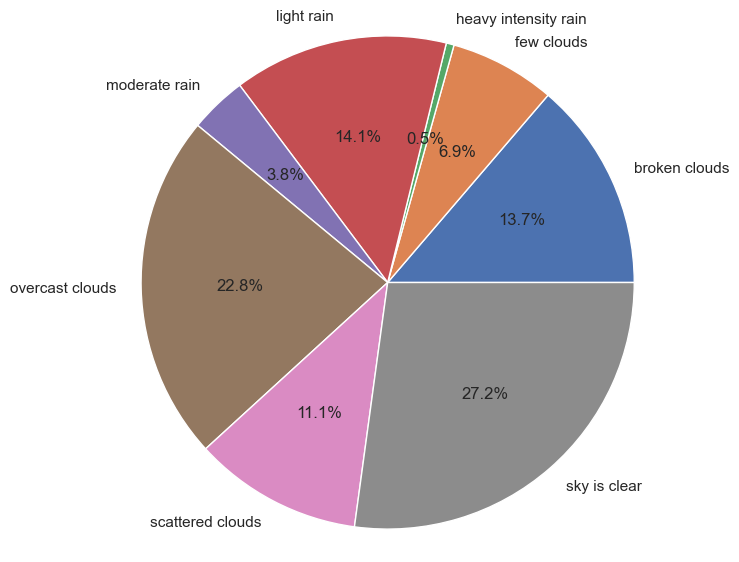

In [74]:
labels = meteo_1_copy['weather_description'].astype('category').cat.categories.tolist()
counts = meteo_1_copy['weather_description'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

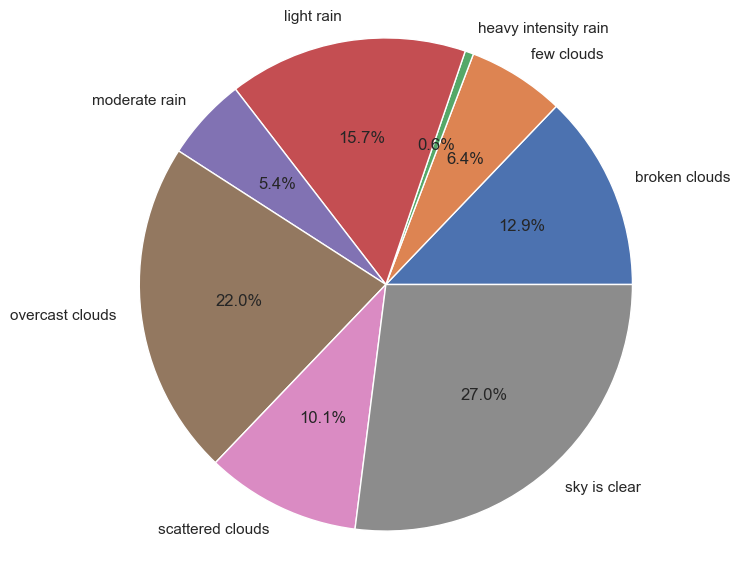

In [75]:
labels_2 = meteo_2_copy['weather_description'].astype('category').cat.categories.tolist()
counts_2 = meteo_2_copy['weather_description'].value_counts()
sizes = [counts_2[var_cat] for var_cat in labels_2]
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels_2, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

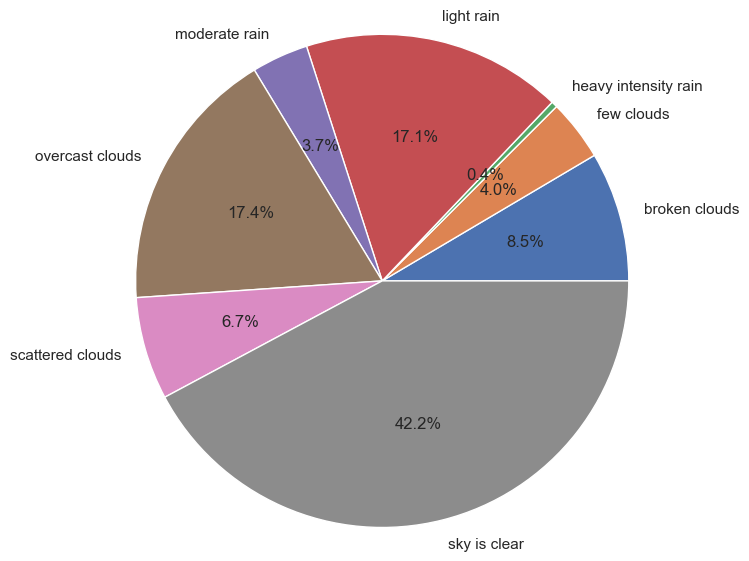

In [76]:
labels_test = meteo_test_copy['weather_description'].astype('category').cat.categories.tolist()
counts_test = meteo_test_copy['weather_description'].value_counts()
sizes = [counts_test[var_cat] for var_cat in labels_test]
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels_test, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

We have several options how to deal with qualitative data:

#### a) Replace Values

Again, we are using data copies to experiment all options.

In [77]:
meteo_1_copy_r1=meteo_1_copy.copy()
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


We need to create a dictionary assigning the string to a numeric value:

sky is clear - 0, overcast clouds - 1, light rain - 2, broken clouds - 3, scattered clouds - 4, few clouds - 5, moderate rain - 6, heavy intensity rain - 7

In [78]:
replace_map = {'weather_description': {'sky is clear': 0, 'overcast clouds': 1, 'light rain': 2, 'broken clouds': 3, 'scattered clouds': 4, 'few clouds': 5, 'moderate rain': 6, 'heavy intensity rain': 7}}
print(replace_map)

{'weather_description': {'sky is clear': 0, 'overcast clouds': 1, 'light rain': 2, 'broken clouds': 3, 'scattered clouds': 4, 'few clouds': 5, 'moderate rain': 6, 'heavy intensity rain': 7}}


We can create a replacement map in other way:

In [79]:
labels = meteo_1_copy_r1['weather_description'].astype('category').cat.categories.tolist()
replace_map_comp = {'weather_description' : {k:v for k,v in zip(labels, list(range(0,len(labels)+1)))}}
print(replace_map_comp)

{'weather_description': {'broken clouds': 0, 'few clouds': 1, 'heavy intensity rain': 2, 'light rain': 3, 'moderate rain': 4, 'overcast clouds': 5, 'scattered clouds': 6, 'sky is clear': 7}}


In [80]:
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Now we need to replace with the new values:

In [81]:
meteo_1_copy_r1.replace(replace_map_comp,inplace=True)
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,5
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,5
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


Done! Now we can see that the type of values are <em>int64</em>:

In [82]:
print(meteo_1_copy_r1['weather_description'].dtypes)

int64


#### b) Label encoding

In [83]:
meteo_1_copy_r2=meteo_1_copy.copy()
meteo_1_copy_r2.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


In [84]:
print(meteo_1_copy_r2.dtypes)

dt                       int64
dt_iso                  object
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
rain_1h                float64
clouds_all               int64
weather_description     object
dtype: object


Similar to the previous examples, each string will be assigned a number. Instead of replacing the values under the column <em>incidents</em>, we are going to create a new colum to each created label.

In [85]:
meteo_1_copy_r2['None'] = np.where(meteo_1_copy_r2['weather_description'].str.contains('None'), 1, 0)
meteo_1_copy_r2.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,None
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,0
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,0


To complete the process, it is needed to replicate for each label and then drop the column <em>weather_description</em>.

Let's see another way to label encoding. This uses the <em>LabelEncoder</em> from <em>sklearn</em>.

In [86]:
meteo_1_copy_r2_sk1 = meteo_1_copy.copy()
meteo_1_copy_r2_r22=meteo_1_copy.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
meteo_1_copy_r2_sk1['weather_description_code'] = lb_make.fit_transform(meteo_1_copy_r2_r22['weather_description'])

meteo_1_copy_r2_sk1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,weather_description_code
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,5
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,5
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,4


It creates a new column, <em>weather_description_code</em>, with the labels assigned to feature <em>weather_description</em>. The numeric values were assigned randomly, being the crescent order not apllicable to the meaning of the qualifying words.

#### c) One-Hot encoding

This alternative uses <em>LabelBinarizer</em> of <em>sklearn</em> and creates a matrix with bits regarding each label.

In [87]:
meteo_1_copy_r3 = meteo_1_copy.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(meteo_1_copy_r3['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [88]:
result_df = pd.concat([meteo_1_copy_r3, lb_results_df], axis=1)
result_df.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,1,0,0,0,0,0,0,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,0,0,0,0,0,1,0,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,0,0,0,0,0,1,0,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,0,0,0,1,0,0,0,0
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,0,0,0,0,1,0,0,0


#### d) Binary Encoding
Similar to the previous technique, it creates a matrix of the status of the values, but this time with binary values. See the comparison between techniques below:

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the <em>category_encoders</em> installed:
<code>!pip install category_encoders</code>

In [89]:
meteo_1_copy_r4 = meteo_1_copy.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['weather_description'])
df_binary = encoder.fit_transform(meteo_1_copy_r4)

df_binary.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description_0,weather_description_1,weather_description_2,weather_description_3
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,0,0,0,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,0,0,1,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,0,0,1,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,0,0,1,1
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,0,1,0,0


#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

In [90]:
meteo_1_copy_r5 = meteo_1_copy.copy()

encoder = ce.BackwardDifferenceEncoder(cols=['weather_description'])
df_bd = encoder.fit_transform(meteo_1_copy_r5)

df_bd.head()

C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6
0,1,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
1,1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,0.125,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
2,1,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,0.125,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
3,1,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,0.125,0.25,-0.625,-0.5,-0.375,-0.25,-0.125
4,1,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,0.125,0.25,0.375,-0.5,-0.375,-0.25,-0.125


#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

In [91]:
meteo_1_copy_r6 = meteo_1_copy.copy()

In [92]:
meteo_1_copy_r6['weather_description'] = pd.factorize(meteo_1_copy_r6['weather_description'])[0] + 1
meteo_1_copy_r6.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


We will choose the factorize technique to keep going.

In [93]:
meteo_1_copy['weather_description'] = pd.factorize(meteo_1_copy['weather_description'])[0] + 1
meteo_1_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


Now do the same for the others.

In [94]:
meteo_2_copy['weather_description'] = pd.factorize(meteo_2_copy['weather_description'])[0] + 1
meteo_test_copy['weather_description'] = pd.factorize(meteo_test_copy['weather_description'])[0] + 1
meteo_2_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,16.59,16.00,16.21,16.72,1024,65,3.15,0.0,97,1
1,1640998800,2022-01-01 01:00:00 +0000 UTC,16.59,16.00,16.21,16.72,1024,65,3.14,0.0,58,2
2,1641002400,2022-01-01 02:00:00 +0000 UTC,16.59,16.03,15.67,16.72,1024,66,3.12,0.0,23,3
3,1641006000,2022-01-01 03:00:00 +0000 UTC,13.59,12.75,11.61,16.16,1023,67,3.08,0.0,22,3
4,1641009600,2022-01-01 04:00:00 +0000 UTC,14.97,14.27,14.72,15.66,1023,67,3.12,0.0,15,3


In [95]:
meteo_test_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,1
1,1672534800,2023-01-01 01:00:00 +0000 UTC,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,1
2,1672538400,2023-01-01 02:00:00 +0000 UTC,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,1
3,1672542000,2023-01-01 03:00:00 +0000 UTC,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,1
4,1672545600,2023-01-01 04:00:00 +0000 UTC,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,1


Other option would it be to filter the <em>NaN</em> values when reading the CSV file:

<code>data = pd.read_csv('incidents.csv', na_filter=False)</code>

Now let's go through the same process but with the feature <em>Injecao na rede (kWh)</em>

In [96]:
energy_1_copy['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
0            1690
High          207
Medium        182
Low           109
Very High      68
Name: count, dtype: int64

Let's create a barplot of <em>Frequency of Injection into the grid in kWh</em> (style="darkgrid", fontsize=12)

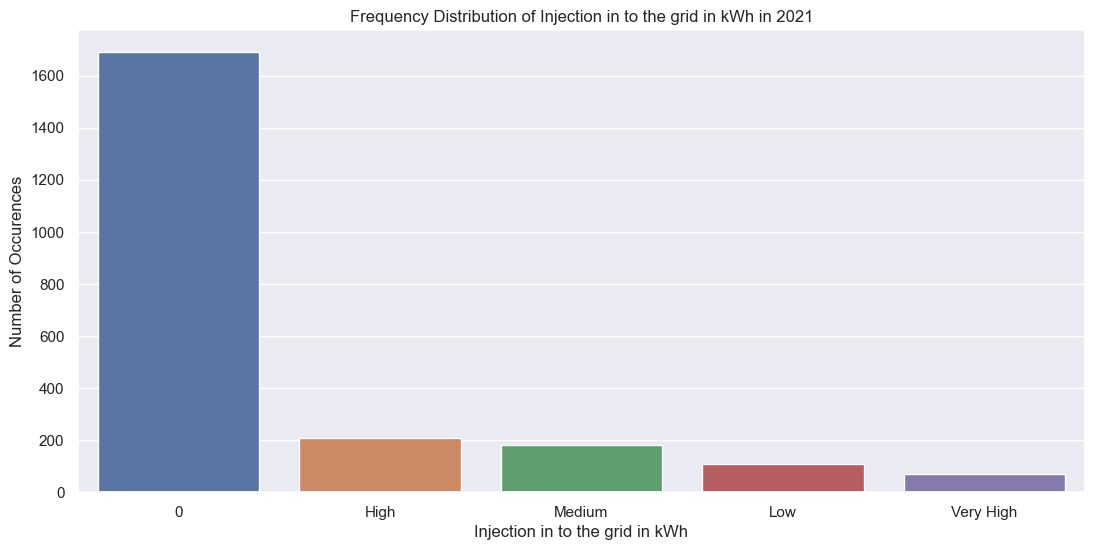

In [97]:
injection_count = energy_1_copy['Injecao na rede (kWh)'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=injection_count.index, y=injection_count.values)
plt.title('Frequency Distribution of Injection in to the grid in kWh in 2021')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Injection in to the grid in kWh', fontsize=12)
plt.show()

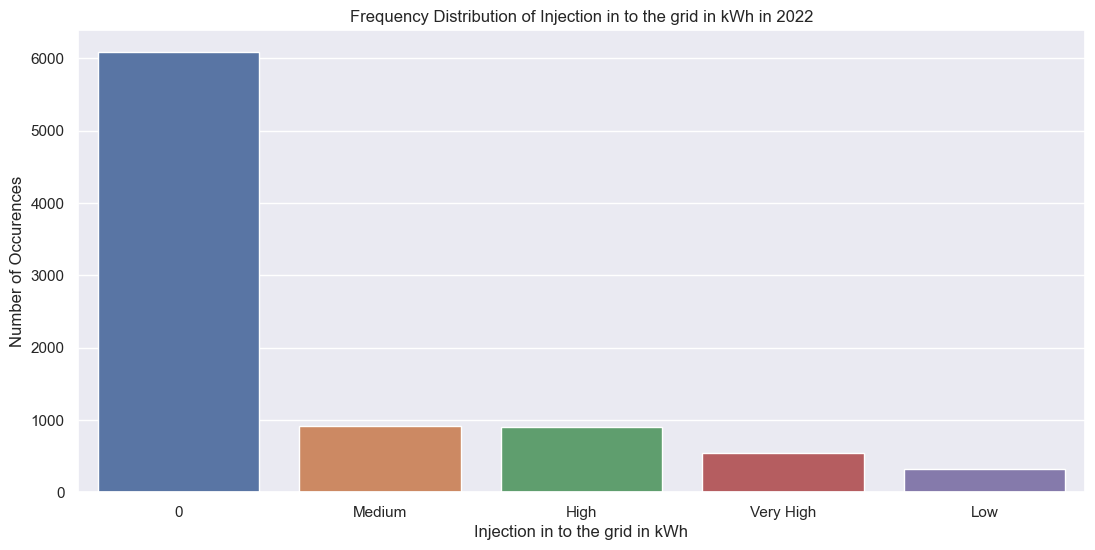

In [98]:
injection_count_2 = energy_2_copy['Injecao na rede (kWh)'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=injection_count_2.index, y=injection_count_2.values)
plt.title('Frequency Distribution of Injection in to the grid in kWh in 2022')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Injection in to the grid in kWh', fontsize=12)
plt.show()

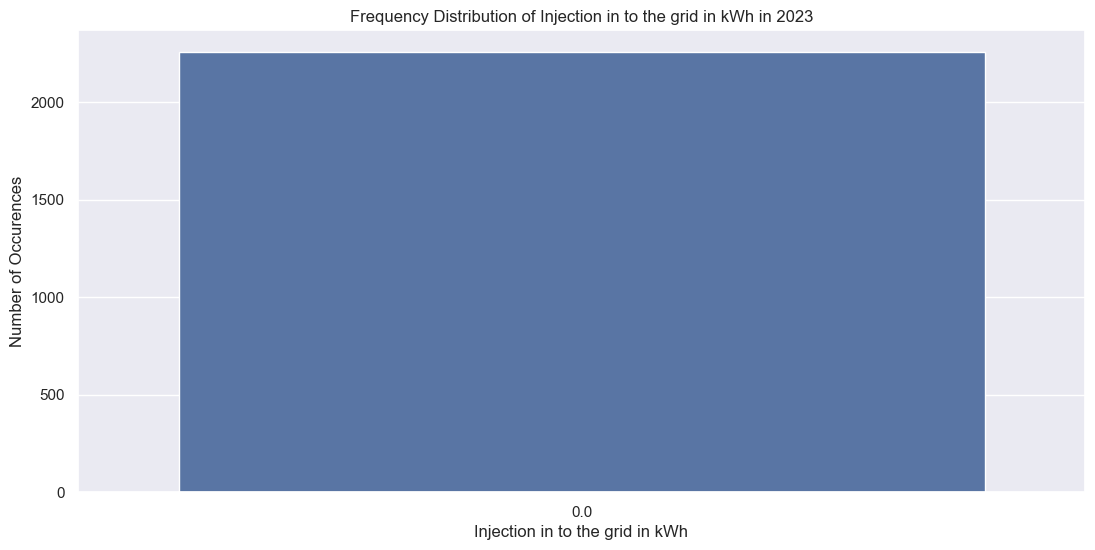

In [99]:
injection_count_test = energy_test_copy['Injecao na rede (kWh)'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=injection_count_test.index, y=injection_count_test.values)
plt.title('Frequency Distribution of Injection in to the grid in kWh in 2023')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Injection in to the grid in kWh', fontsize=12)
plt.show()

To better visualize the distribution let's remove the 0 from this graph, excluding the last dataset since all elements are currently 0. 

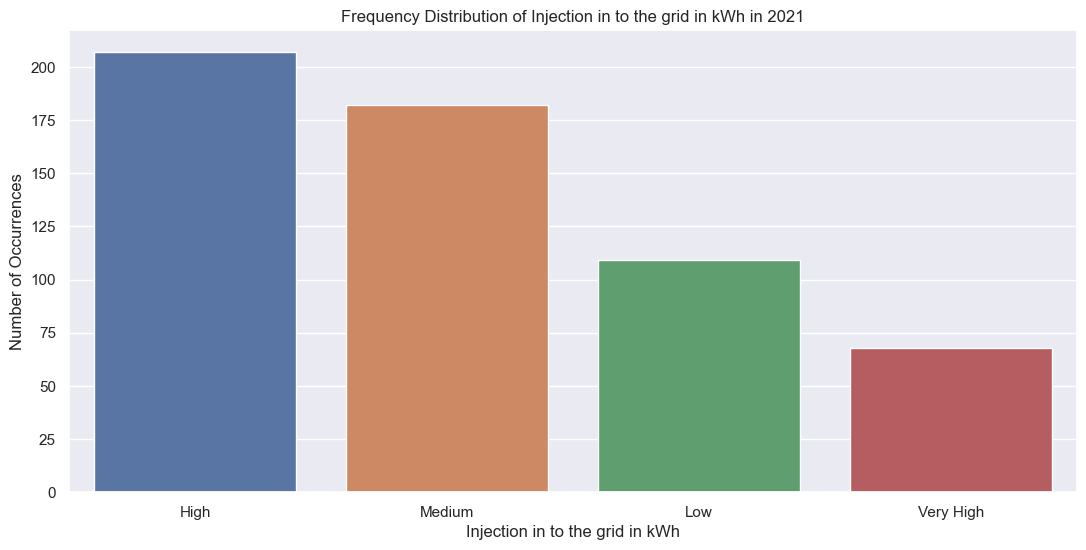

In [100]:
unwanted_value = 0

filtered_injection_count = energy_1_copy[energy_1_copy['Injecao na rede (kWh)'] != unwanted_value]['Injecao na rede (kWh)'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=filtered_injection_count.index, y=filtered_injection_count.values)
plt.title('Frequency Distribution of Injection in to the grid in kWh in 2021')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Injection in to the grid in kWh', fontsize=12)
plt.show()

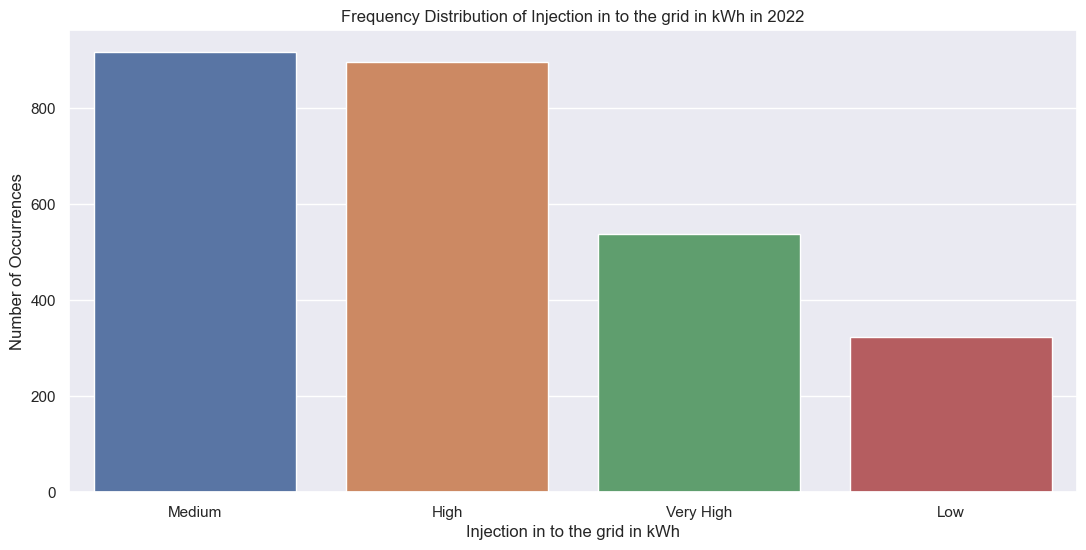

In [101]:
unwanted_value = 0

filtered_injection_count_2 = energy_2_copy[energy_2_copy['Injecao na rede (kWh)'] != unwanted_value]['Injecao na rede (kWh)'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=filtered_injection_count_2.index, y=filtered_injection_count_2.values)
plt.title('Frequency Distribution of Injection in to the grid in kWh in 2022')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Injection in to the grid in kWh', fontsize=12)
plt.show()

Let's create a pie plot of <em>Category Injection into the grid in kWh</em>, also removing 0 to also better visualize the data, except for the last one since it only has 0.

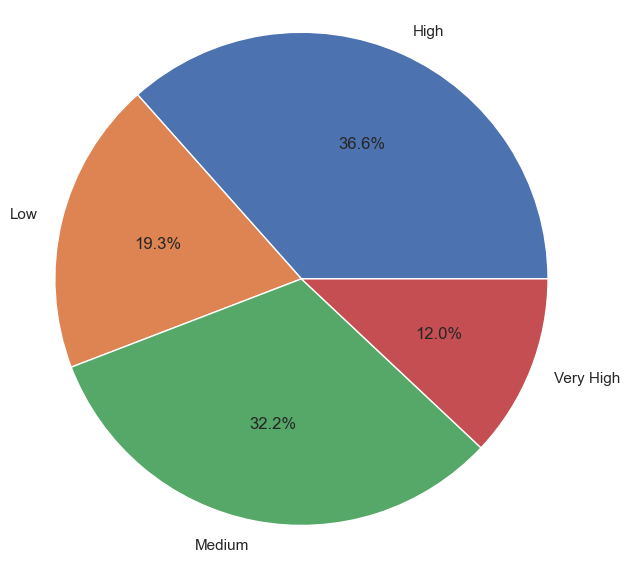

In [103]:
unwanted_value = 0

filtered_energy_1_copy = energy_1_copy[energy_1_copy['Injecao na rede (kWh)'] != unwanted_value]

labels = filtered_energy_1_copy['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
counts = filtered_energy_1_copy['Injecao na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

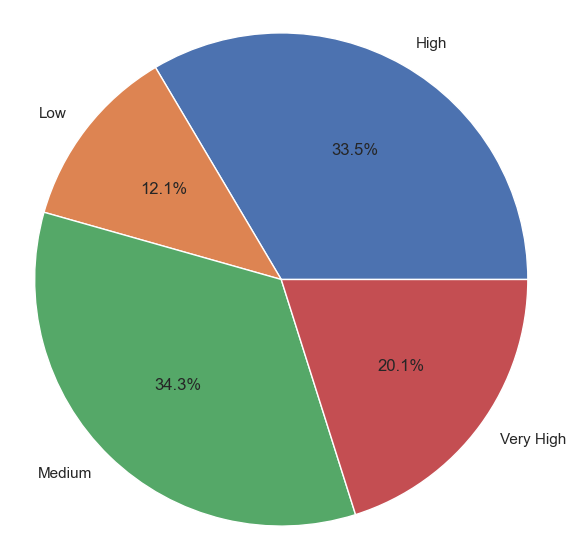

In [104]:
unwanted_value = 0

filtered_energy_2_copy = energy_2_copy[energy_2_copy['Injecao na rede (kWh)'] != unwanted_value]

labels_2 = filtered_energy_2_copy['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
counts_2 = filtered_energy_2_copy['Injecao na rede (kWh)'].value_counts()
sizes = [counts_2[var_cat] for var_cat in labels_2]

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels_2, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

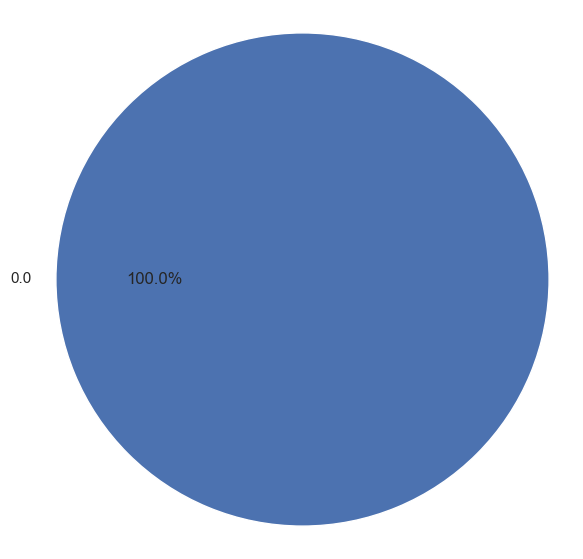

In [107]:
labels_test = energy_test_copy['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
counts_test = energy_test_copy['Injecao na rede (kWh)'].value_counts()
sizes = [counts_test[var_cat] for var_cat in labels_test]
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels_test, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

We will also choose the factorize technique to keep going.

In [108]:
energy_1_copy['Injecao na rede (kWh)'] = pd.factorize(energy_1_copy['Injecao na rede (kWh)'])[0] + 1
energy_2_copy['Injecao na rede (kWh)'] = pd.factorize(energy_2_copy['Injecao na rede (kWh)'])[0] + 1
energy_test_copy['Injecao na rede (kWh)'] = pd.factorize(energy_test_copy['Injecao na rede (kWh)'])[0] + 1
energy_1_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,1
1,2021-09-29 01:00:00,0.0,0.0,0.0,1
2,2021-09-29 02:00:00,0.0,0.0,0.0,1
3,2021-09-29 03:00:00,0.0,0.0,0.0,1
4,2021-09-29 04:00:00,0.0,0.0,0.0,1


In [109]:
energy_2_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01 00:00:00,0.0,0.486,0.0,1
1,2022-01-01 01:00:00,0.0,0.429,0.0,1
2,2022-01-01 02:00:00,0.0,0.463,0.0,1
3,2022-01-01 03:00:00,0.0,0.545,0.0,1
4,2022-01-01 04:00:00,0.0,0.439,0.0,1


In [110]:
energy_test_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2023-01-01 00:00:00,0.0,0.467,0.0,1
1,2023-01-01 01:00:00,0.0,0.577,0.0,1
2,2023-01-01 02:00:00,0.0,0.346,0.0,1
3,2023-01-01 03:00:00,0.0,0.270,0.0,1
4,2023-01-01 04:00:00,0.0,0.252,0.0,1


In [111]:
energy_1_copy['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
1    1690
4     207
3     182
2     109
5      68
Name: count, dtype: int64

In [112]:
energy_2_copy['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
1    6087
2     916
4     896
5     538
3     323
Name: count, dtype: int64

In [113]:
energy_test_copy['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
1    2256
Name: count, dtype: int64

So now we know that 1: None, 2: Low, 3: Medium, 4: High and 5:Very High

Since there are no more categoric columns we will resume with the file like it is.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

In [ ]:
energy_1_copy_dt = energy_1_copy.copy()

In [ ]:
energy_1_copy_dt['Data'].head()

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

In [ ]:
energy_1_copy_dt['Data'] = pd.to_datetime(energy_1_copy_dt['Data'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
assert energy_1_copy_dt['Data'].isnull().sum()==0, 'missing record date'

In [ ]:
energy_1_copy_dt['Data'].head()

We can extract parts of the date and create new columns with that:

In [ ]:
energy_1_copy_dt['Data_year'] = energy_1_copy_dt['Data'].dt.year
energy_1_copy_dt['Data_month'] = energy_1_copy_dt['Data'].dt.month
energy_1_copy_dt['Data_day'] = energy_1_copy_dt['Data'].dt.day
energy_1_copy_dt['Data_hour'] = energy_1_copy_dt['Data'].dt.hour
energy_1_copy_dt['Data_minute'] = energy_1_copy_dt['Data'].dt.minute
energy_1_copy_dt['Data_second'] = energy_1_copy_dt['Data'].dt.second

In [ ]:
energy_1_copy_dt.head()

In [ ]:
energy_1_copy_dt.nunique()

Since <em>year</em>, <em>minute</em> and <em>second</em> have only one value, we will drop them.

In [ ]:
energy_1_copy_dt.drop('Data_year', axis=1, inplace=True)
energy_1_copy_dt.drop('Data_minute', axis=1, inplace=True)
energy_1_copy_dt.drop('Data_second', axis=1, inplace=True)
energy_1_copy_dt.dropna(inplace=True)

In [ ]:
energy_1_copy_dt.head()

Other functions to deal with dates

In [ ]:
energy_1_copy_dt2 = energy_1_copy.copy()

In [ ]:
energy_1_copy_dt2['Data'] = pd.to_datetime(energy_1_copy_dt2['Data'])
energy_1_copy_dt2.info()

In [ ]:
energy_1_copy_dt2.head()

We can use <em>datetime.today</em> and fetch the actual date.

In [ ]:
import datetime

today = datetime.datetime.today()

today

It can be measured the time elapsed between the dates on the dataset and today.

In [ ]:
today - energy_1_copy_dt2['Data']

In [ ]:
(today - energy_1_copy_dt2['Data']).dt.days

And we can also separate each component of the date by day, month, hour, time, etc.

In [ ]:
energy_1_copy_dt2['day'] = energy_1_copy_dt2['Data'].dt.day
energy_1_copy_dt2['month'] = energy_1_copy_dt2['Data'].dt.month
energy_1_copy_dt2['hour'] = energy_1_copy_dt2['Data'].dt.hour
energy_1_copy_dt2['time'] = energy_1_copy_dt2['Data'].dt.time
energy_1_copy_dt2.head()

Now we need to choose how to deal with the <em>Data</em>, and again dropping the values as we came to the conclusion before.

In [115]:
energy_1_copy['Data'] = pd.to_datetime(energy_2_copy['Data'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert energy_1_copy['Data'].isnull().sum()==0, 'missing record date'
energy_1_copy['Data'].head()

0   2022-01-01 00:00:00
1   2022-01-01 01:00:00
2   2022-01-01 02:00:00
3   2022-01-01 03:00:00
4   2022-01-01 04:00:00
Name: Data, dtype: datetime64[ns]

In [116]:
energy_2_copy['Data'] = pd.to_datetime(energy_2_copy['Data'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert energy_2_copy['Data'].isnull().sum()==0, 'missing record date'
energy_2_copy['Data'].head()

0   2022-01-01 00:00:00
1   2022-01-01 01:00:00
2   2022-01-01 02:00:00
3   2022-01-01 03:00:00
4   2022-01-01 04:00:00
Name: Data, dtype: datetime64[ns]

In [118]:
energy_test_copy['Data'] = pd.to_datetime(energy_test_copy['Data'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert energy_test_copy['Data'].isnull().sum()==0, 'missing record date'
energy_test_copy['Data'].head()

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: Data, dtype: datetime64[ns]

In [121]:
energy_1_copy['Data_year'] = energy_1_copy['Data'].dt.year
energy_1_copy['Data_month'] = energy_1_copy['Data'].dt.month
energy_1_copy['Data_day'] = energy_1_copy['Data'].dt.day
energy_1_copy['Data_hour'] = energy_1_copy['Data'].dt.hour
energy_1_copy['Data_minute'] = energy_1_copy['Data'].dt.minute
energy_1_copy['Data_second'] = energy_1_copy['Data'].dt.second

energy_1_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_year,Data_month,Data_day,Data_hour,Data_minute,Data_second
0,2022-01-01 00:00:00,0.0,0.0,0.0,1,2022,1,1,0,0,0
1,2022-01-01 01:00:00,0.0,0.0,0.0,1,2022,1,1,1,0,0
2,2022-01-01 02:00:00,0.0,0.0,0.0,1,2022,1,1,2,0,0
3,2022-01-01 03:00:00,0.0,0.0,0.0,1,2022,1,1,3,0,0
4,2022-01-01 04:00:00,0.0,0.0,0.0,1,2022,1,1,4,0,0


In [122]:
energy_1_copy.drop('Data_year', axis=1, inplace=True)
energy_1_copy.drop('Data_minute', axis=1, inplace=True)
energy_1_copy.drop('Data_second', axis=1, inplace=True)
energy_1_copy.dropna(inplace=True)
energy_1_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_month,Data_day,Data_hour
0,2022-01-01 00:00:00,0.0,0.0,0.0,1,1,1,0
1,2022-01-01 01:00:00,0.0,0.0,0.0,1,1,1,1
2,2022-01-01 02:00:00,0.0,0.0,0.0,1,1,1,2
3,2022-01-01 03:00:00,0.0,0.0,0.0,1,1,1,3
4,2022-01-01 04:00:00,0.0,0.0,0.0,1,1,1,4


In [123]:
energy_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horario Economico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injecao na rede (kWh)    2256 non-null   int64         
 5   Data_month               2256 non-null   int32         
 6   Data_day                 2256 non-null   int32         
 7   Data_hour                2256 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1)
memory usage: 114.7 KB


In [124]:
energy_2_copy['Data_year'] = energy_2_copy['Data'].dt.year
energy_2_copy['Data_month'] = energy_2_copy['Data'].dt.month
energy_2_copy['Data_day'] = energy_2_copy['Data'].dt.day
energy_2_copy['Data_hour'] = energy_2_copy['Data'].dt.hour
energy_2_copy['Data_minute'] = energy_2_copy['Data'].dt.minute
energy_2_copy['Data_second'] = energy_2_copy['Data'].dt.second

energy_2_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_year,Data_month,Data_day,Data_hour,Data_minute,Data_second
0,2022-01-01 00:00:00,0.0,0.486,0.0,1,2022,1,1,0,0,0
1,2022-01-01 01:00:00,0.0,0.429,0.0,1,2022,1,1,1,0,0
2,2022-01-01 02:00:00,0.0,0.463,0.0,1,2022,1,1,2,0,0
3,2022-01-01 03:00:00,0.0,0.545,0.0,1,2022,1,1,3,0,0
4,2022-01-01 04:00:00,0.0,0.439,0.0,1,2022,1,1,4,0,0


In [125]:
energy_2_copy.drop('Data_year', axis=1, inplace=True)
energy_2_copy.drop('Data_minute', axis=1, inplace=True)
energy_2_copy.drop('Data_second', axis=1, inplace=True)
energy_2_copy.dropna(inplace=True)
energy_2_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_month,Data_day,Data_hour
0,2022-01-01 00:00:00,0.0,0.486,0.0,1,1,1,0
1,2022-01-01 01:00:00,0.0,0.429,0.0,1,1,1,1
2,2022-01-01 02:00:00,0.0,0.463,0.0,1,1,1,2
3,2022-01-01 03:00:00,0.0,0.545,0.0,1,1,1,3
4,2022-01-01 04:00:00,0.0,0.439,0.0,1,1,1,4


In [126]:
energy_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     8760 non-null   datetime64[ns]
 1   Normal (kWh)             8760 non-null   float64       
 2   Horario Economico (kWh)  8760 non-null   float64       
 3   Autoconsumo (kWh)        8760 non-null   float64       
 4   Injecao na rede (kWh)    8760 non-null   int64         
 5   Data_month               8760 non-null   int32         
 6   Data_day                 8760 non-null   int32         
 7   Data_hour                8760 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1)
memory usage: 445.0 KB


In [127]:
energy_test_copy['Data_year'] = energy_test_copy['Data'].dt.year
energy_test_copy['Data_month'] = energy_test_copy['Data'].dt.month
energy_test_copy['Data_day'] = energy_test_copy['Data'].dt.day
energy_test_copy['Data_hour'] = energy_test_copy['Data'].dt.hour
energy_test_copy['Data_minute'] = energy_test_copy['Data'].dt.minute
energy_test_copy['Data_second'] = energy_test_copy['Data'].dt.second

energy_test_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_year,Data_month,Data_day,Data_hour,Data_minute,Data_second
0,2023-01-01 00:00:00,0.0,0.467,0.0,1,2023,1,1,0,0,0
1,2023-01-01 01:00:00,0.0,0.577,0.0,1,2023,1,1,1,0,0
2,2023-01-01 02:00:00,0.0,0.346,0.0,1,2023,1,1,2,0,0
3,2023-01-01 03:00:00,0.0,0.270,0.0,1,2023,1,1,3,0,0
4,2023-01-01 04:00:00,0.0,0.252,0.0,1,2023,1,1,4,0,0


In [128]:
energy_test_copy.drop('Data_year', axis=1, inplace=True)
energy_test_copy.drop('Data_minute', axis=1, inplace=True)
energy_test_copy.drop('Data_second', axis=1, inplace=True)
energy_test_copy.dropna(inplace=True)
energy_test_copy.head()

,Data,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_month,Data_day,Data_hour
0,2023-01-01 00:00:00,0.0,0.467,0.0,1,1,1,0
1,2023-01-01 01:00:00,0.0,0.577,0.0,1,1,1,1
2,2023-01-01 02:00:00,0.0,0.346,0.0,1,1,1,2
3,2023-01-01 03:00:00,0.0,0.270,0.0,1,1,1,3
4,2023-01-01 04:00:00,0.0,0.252,0.0,1,1,1,4


In [130]:
energy_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horario Economico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injecao na rede (kWh)    2256 non-null   int64         
 5   Data_month               2256 non-null   int32         
 6   Data_day                 2256 non-null   int32         
 7   Data_hour                2256 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1)
memory usage: 114.7 KB


In [131]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   temp                 2928 non-null   float64
 3   feels_like           2928 non-null   float64
 4   temp_min             2928 non-null   float64
 5   temp_max             2928 non-null   float64
 6   pressure             2928 non-null   int64  
 7   humidity             2928 non-null   int64  
 8   wind_speed           2928 non-null   float64
 9   rain_1h              2928 non-null   float64
 10  clouds_all           2928 non-null   int64  
 11  weather_description  2928 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 274.6+ KB


Now we need to do the same process but for the meteo dataset for the <em>dt</em> and <em>dt_iso</em> columns.

In [132]:
meteo_1_copy['dt_iso'].head()

0    2021-09-01 00:00:00 +0000 UTC
1    2021-09-01 01:00:00 +0000 UTC
2    2021-09-01 02:00:00 +0000 UTC
3    2021-09-01 03:00:00 +0000 UTC
4    2021-09-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [133]:
meteo_2_copy['dt_iso'].head()

0    2022-01-01 00:00:00 +0000 UTC
1    2022-01-01 01:00:00 +0000 UTC
2    2022-01-01 02:00:00 +0000 UTC
3    2022-01-01 03:00:00 +0000 UTC
4    2022-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [134]:
meteo_test_copy['dt_iso'].head()

0    2023-01-01 00:00:00 +0000 UTC
1    2023-01-01 01:00:00 +0000 UTC
2    2023-01-01 02:00:00 +0000 UTC
3    2023-01-01 03:00:00 +0000 UTC
4    2023-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

Since all dates have <em>+0000</em> and <em>UTC</em>, we don't need them.

In [135]:
meteo_1_copy['dt_iso'].replace(to_replace=r' \+0000 UTC', value='', regex=True, inplace=True)
meteo_1_copy['dt_iso'].head()

0    2021-09-01 00:00:00
1    2021-09-01 01:00:00
2    2021-09-01 02:00:00
3    2021-09-01 03:00:00
4    2021-09-01 04:00:00
Name: dt_iso, dtype: object

In [136]:
meteo_1_copy['dt_iso'] = pd.to_datetime(meteo_1_copy['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert meteo_1_copy['dt_iso'].isnull().sum()==0, 'missing record date'
meteo_1_copy['dt_iso'].head()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [137]:
meteo_2_copy['dt_iso'].replace(to_replace=r' \+0000 UTC', value='', regex=True, inplace=True)
meteo_2_copy['dt_iso'].head()

0    2022-01-01 00:00:00
1    2022-01-01 01:00:00
2    2022-01-01 02:00:00
3    2022-01-01 03:00:00
4    2022-01-01 04:00:00
Name: dt_iso, dtype: object

In [138]:
meteo_2_copy['dt_iso'] = pd.to_datetime(meteo_2_copy['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert meteo_2_copy['dt_iso'].isnull().sum()==0, 'missing record date'
meteo_2_copy['dt_iso'].head()

0   2022-01-01 00:00:00
1   2022-01-01 01:00:00
2   2022-01-01 02:00:00
3   2022-01-01 03:00:00
4   2022-01-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [139]:
meteo_test_copy['dt_iso'].replace(to_replace=r' \+0000 UTC', value='', regex=True, inplace=True)
meteo_test_copy['dt_iso'].head()

0    2023-01-01 00:00:00
1    2023-01-01 01:00:00
2    2023-01-01 02:00:00
3    2023-01-01 03:00:00
4    2023-01-01 04:00:00
Name: dt_iso, dtype: object

In [140]:
meteo_test_copy['dt_iso'] = pd.to_datetime(meteo_test_copy['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert meteo_test_copy['dt_iso'].isnull().sum()==0, 'missing record date'
meteo_test_copy['dt_iso'].head()

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Since <em>dt</em> is just the same date as <em>dt_iso</em> but as a timestamp, we can remove it.

In [141]:
meteo_1_copy.drop('dt', axis=1, inplace=True)
meteo_1_copy.dropna(inplace=True)
meteo_1_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


In [142]:
meteo_2_copy.drop('dt', axis=1, inplace=True)
meteo_2_copy.dropna(inplace=True)
meteo_2_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2022-01-01 00:00:00,16.59,16.00,16.21,16.72,1024,65,3.15,0.0,97,1
1,2022-01-01 01:00:00,16.59,16.00,16.21,16.72,1024,65,3.14,0.0,58,2
2,2022-01-01 02:00:00,16.59,16.03,15.67,16.72,1024,66,3.12,0.0,23,3
3,2022-01-01 03:00:00,13.59,12.75,11.61,16.16,1023,67,3.08,0.0,22,3
4,2022-01-01 04:00:00,14.97,14.27,14.72,15.66,1023,67,3.12,0.0,15,3


In [143]:
meteo_test_copy.drop('dt', axis=1, inplace=True)
meteo_test_copy.dropna(inplace=True)
meteo_test_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2023-01-01 00:00:00,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,1
1,2023-01-01 01:00:00,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,1
2,2023-01-01 02:00:00,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,1
3,2023-01-01 03:00:00,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,1
4,2023-01-01 04:00:00,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,1


In [144]:
meteo_1_copy['dt_iso_year'] = meteo_1_copy['dt_iso'].dt.year
meteo_1_copy['dt_iso_month'] = meteo_1_copy['dt_iso'].dt.month
meteo_1_copy['dt_iso_day'] = meteo_1_copy['dt_iso'].dt.day
meteo_1_copy['dt_iso_hour'] = meteo_1_copy['dt_iso'].dt.hour
meteo_1_copy['dt_iso_minute'] = meteo_1_copy['dt_iso'].dt.minute
meteo_1_copy['dt_iso_second'] = meteo_1_copy['dt_iso'].dt.second

In [145]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               2928 non-null   datetime64[ns]
 1   temp                 2928 non-null   float64       
 2   feels_like           2928 non-null   float64       
 3   temp_min             2928 non-null   float64       
 4   temp_max             2928 non-null   float64       
 5   pressure             2928 non-null   int64         
 6   humidity             2928 non-null   int64         
 7   wind_speed           2928 non-null   float64       
 8   rain_1h              2928 non-null   float64       
 9   clouds_all           2928 non-null   int64         
 10  weather_description  2928 non-null   int64         
 11  dt_iso_year          2928 non-null   int32         
 12  dt_iso_month         2928 non-null   int32         
 13  dt_iso_day           2928 non-nul

In [146]:
meteo_1_copy.nunique()

dt_iso                 2928
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
humidity                 70
wind_speed              569
rain_1h                 174
clouds_all              101
weather_description       8
dt_iso_year               1
dt_iso_month              4
dt_iso_day               31
dt_iso_hour              24
dt_iso_minute             1
dt_iso_second             1
dtype: int64

In [147]:
meteo_2_copy['dt_iso_year'] = meteo_2_copy['dt_iso'].dt.year
meteo_2_copy['dt_iso_month'] = meteo_2_copy['dt_iso'].dt.month
meteo_2_copy['dt_iso_day'] = meteo_2_copy['dt_iso'].dt.day
meteo_2_copy['dt_iso_hour'] = meteo_2_copy['dt_iso'].dt.hour
meteo_2_copy['dt_iso_minute'] = meteo_2_copy['dt_iso'].dt.minute
meteo_2_copy['dt_iso_second'] = meteo_2_copy['dt_iso'].dt.second

In [148]:
meteo_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               8760 non-null   datetime64[ns]
 1   temp                 8760 non-null   float64       
 2   feels_like           8760 non-null   float64       
 3   temp_min             8760 non-null   float64       
 4   temp_max             8760 non-null   float64       
 5   pressure             8760 non-null   int64         
 6   humidity             8760 non-null   int64         
 7   wind_speed           8760 non-null   float64       
 8   rain_1h              8760 non-null   float64       
 9   clouds_all           8760 non-null   int64         
 10  weather_description  8760 non-null   int64         
 11  dt_iso_year          8760 non-null   int32         
 12  dt_iso_month         8760 non-null   int32         
 13  dt_iso_day           8760 non-nul

In [149]:
meteo_2_copy.nunique()

dt_iso                 8760
temp                   2277
feels_like             2585
temp_min                424
temp_max                511
pressure                 41
humidity                 82
wind_speed              761
rain_1h                 348
clouds_all              101
weather_description       8
dt_iso_year               1
dt_iso_month             12
dt_iso_day               31
dt_iso_hour              24
dt_iso_minute             1
dt_iso_second             1
dtype: int64

In [150]:
meteo_test_copy['dt_iso_year'] = meteo_test_copy['dt_iso'].dt.year
meteo_test_copy['dt_iso_month'] = meteo_test_copy['dt_iso'].dt.month
meteo_test_copy['dt_iso_day'] = meteo_test_copy['dt_iso'].dt.day
meteo_test_copy['dt_iso_hour'] = meteo_test_copy['dt_iso'].dt.hour
meteo_test_copy['dt_iso_minute'] = meteo_test_copy['dt_iso'].dt.minute
meteo_test_copy['dt_iso_second'] = meteo_test_copy['dt_iso'].dt.second

In [151]:
meteo_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               1752 non-null   datetime64[ns]
 1   temp                 1752 non-null   float64       
 2   feels_like           1752 non-null   float64       
 3   temp_min             1752 non-null   float64       
 4   temp_max             1752 non-null   float64       
 5   pressure             1752 non-null   int64         
 6   humidity             1752 non-null   int64         
 7   wind_speed           1752 non-null   float64       
 8   rain_1h              1752 non-null   float64       
 9   clouds_all           1752 non-null   int64         
 10  weather_description  1752 non-null   int64         
 11  dt_iso_year          1752 non-null   int32         
 12  dt_iso_month         1752 non-null   int32         
 13  dt_iso_day           1752 non-nul

In [152]:
meteo_test_copy.nunique()

dt_iso                 1752
temp                    889
feels_like             1007
temp_min                169
temp_max                174
pressure                 31
humidity                 71
wind_speed              512
rain_1h                 121
clouds_all               99
weather_description       8
dt_iso_year               1
dt_iso_month              3
dt_iso_day               31
dt_iso_hour              24
dt_iso_minute             1
dt_iso_second             1
dtype: int64

Since the <em>dt_iso_year</em>, <em>dt_iso_minute</em> and <em>dt_iso_second</em> only have one value we can drop them.

In [153]:
meteo_1_copy.drop(['dt_iso_year'], axis=1, inplace=True)
meteo_1_copy.drop(['dt_iso_minute'], axis=1, inplace=True)
meteo_1_copy.drop(['dt_iso_second'], axis=1, inplace=True)
meteo_1_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dt_iso_month,dt_iso_day,dt_iso_hour
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1,9,1,0
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2,9,1,1
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2,9,1,2
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3,9,1,3
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4,9,1,4


In [154]:
meteo_2_copy.drop(['dt_iso_year'], axis=1, inplace=True)
meteo_2_copy.drop(['dt_iso_minute'], axis=1, inplace=True)
meteo_2_copy.drop(['dt_iso_second'], axis=1, inplace=True)
meteo_2_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dt_iso_month,dt_iso_day,dt_iso_hour
0,2022-01-01 00:00:00,16.59,16.00,16.21,16.72,1024,65,3.15,0.0,97,1,1,1,0
1,2022-01-01 01:00:00,16.59,16.00,16.21,16.72,1024,65,3.14,0.0,58,2,1,1,1
2,2022-01-01 02:00:00,16.59,16.03,15.67,16.72,1024,66,3.12,0.0,23,3,1,1,2
3,2022-01-01 03:00:00,13.59,12.75,11.61,16.16,1023,67,3.08,0.0,22,3,1,1,3
4,2022-01-01 04:00:00,14.97,14.27,14.72,15.66,1023,67,3.12,0.0,15,3,1,1,4


In [155]:
meteo_test_copy.drop(['dt_iso_year'], axis=1, inplace=True)
meteo_test_copy.drop(['dt_iso_minute'], axis=1, inplace=True)
meteo_test_copy.drop(['dt_iso_second'], axis=1, inplace=True)
meteo_test_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dt_iso_month,dt_iso_day,dt_iso_hour
0,2023-01-01 00:00:00,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100,1,1,1,0
1,2023-01-01 01:00:00,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100,1,1,1,1
2,2023-01-01 02:00:00,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100,1,1,1,2
3,2023-01-01 03:00:00,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100,1,1,1,3
4,2023-01-01 04:00:00,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100,1,1,1,4


## 3. Merging datasets

Now that we are done manipulating the data we are now ready to merge both csv's.
For this we are going to be doing that based on the dates of both, more precisely the <em>Data</em> and <em>dt_iso</em> features and it's associates (aka the one with the month, day and hour represented) and also removing columns that become not needed, those being the duplicates of the month, day and hour.

In [160]:
# Merge based on 'Date' column
merged_data_1 = pd.merge(energy_1_copy, meteo_1_copy, left_on='Data', right_on='dt_iso', how='inner')

# Drop duplicate or unnecessary columns after merging if needed
merged_data_1 = merged_data_1.drop(['dt_iso', 'dt_iso_month', 'dt_iso_day', 'dt_iso_hour'], axis=1)

merged_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     0 non-null      datetime64[ns]
 1   Normal (kWh)             0 non-null      float64       
 2   Horario Economico (kWh)  0 non-null      float64       
 3   Autoconsumo (kWh)        0 non-null      float64       
 4   Injecao na rede (kWh)    0 non-null      int64         
 5   Data_month               0 non-null      int32         
 6   Data_day                 0 non-null      int32         
 7   Data_hour                0 non-null      int32         
 8   temp                     0 non-null      float64       
 9   feels_like               0 non-null      float64       
 10  temp_min                 0 non-null      float64       
 11  temp_max                 0 non-null      float64       
 12  pressure                 0 non-null      int64  

In [161]:
# Save merged data to a new CSV file
merged_data_1.to_csv('merged_data_1.csv', index=False)

In [162]:
# Merge based on 'Date' column
merged_data_2 = pd.merge(energy_2_copy, meteo_2_copy, left_on='Data', right_on='dt_iso', how='inner')

# Drop duplicate or unnecessary columns after merging if needed
merged_data_2 = merged_data_2.drop(['dt_iso', 'dt_iso_month', 'dt_iso_day', 'dt_iso_hour'], axis=1)

merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     8760 non-null   datetime64[ns]
 1   Normal (kWh)             8760 non-null   float64       
 2   Horario Economico (kWh)  8760 non-null   float64       
 3   Autoconsumo (kWh)        8760 non-null   float64       
 4   Injecao na rede (kWh)    8760 non-null   int64         
 5   Data_month               8760 non-null   int32         
 6   Data_day                 8760 non-null   int32         
 7   Data_hour                8760 non-null   int32         
 8   temp                     8760 non-null   float64       
 9   feels_like               8760 non-null   float64       
 10  temp_min                 8760 non-null   float64       
 11  temp_max                 8760 non-null   float64       
 12  pressure                 8760 non-

In [163]:
# Save merged data to a new CSV file
merged_data_2.to_csv('merged_data_2.csv', index=False)

In [164]:
# Merge based on 'Date' column
merged_data_test = pd.merge(energy_test_copy, meteo_test_copy, left_on='Data', right_on='dt_iso', how='inner')

# Drop duplicate or unnecessary columns after merging if needed
merged_data_test = merged_data_test.drop(['dt_iso', 'dt_iso_month', 'dt_iso_day', 'dt_iso_hour'], axis=1)

merged_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     1752 non-null   datetime64[ns]
 1   Normal (kWh)             1752 non-null   float64       
 2   Horario Economico (kWh)  1752 non-null   float64       
 3   Autoconsumo (kWh)        1752 non-null   float64       
 4   Injecao na rede (kWh)    1752 non-null   int64         
 5   Data_month               1752 non-null   int32         
 6   Data_day                 1752 non-null   int32         
 7   Data_hour                1752 non-null   int32         
 8   temp                     1752 non-null   float64       
 9   feels_like               1752 non-null   float64       
 10  temp_min                 1752 non-null   float64       
 11  temp_max                 1752 non-null   float64       
 12  pressure                 1752 non-

In [165]:
# Save merged data to a new CSV file
merged_data_test.to_csv('merged_data_test.csv', index=False)